In [1]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
from dataset import Dataset
from model import Model
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.io import savemat

In [2]:
def sample_z(m, n):
    return np.random.normal(loc=0., scale=1., size=[m, n])
    #return np.random.uniform(-5., 5., size=[m, n])

In [3]:
dt = Dataset('/home/kt/NIST_npy/', one_hot=True)
x_dim = dt.train_data.shape[1]
y_dim = dt.train_label.shape[1]
z_dim = 100

In [4]:
model = Model(x_dim, z_dim, y_dim)
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, "save/model.ckpt")
print("Model restored")

INFO:tensorflow:Restoring parameters from save/model.ckpt
Model restored


In [5]:
dt.n_class

4958

In [6]:
np.where(dt.bincout == 1)[0].shape

(1033,)

In [13]:
condit = []
speakers = []
for i in range(2, 11, 1):
    times = 1
    x = np.where(dt.bincout < i*times)[0]
    tmp1 = 'classes less than ' + str(i*times)
    tmp2 = x.shape[0]
    condit.append(tmp1)
    speakers.append(tmp2)
    print tmp2, tmp1
n = 5
count = n - dt.bincout
idx = np.where(count > 0)[0]
total = count[idx]
gen_sum = np.sum(total)
y = []
for i in range(len(idx)):
    for j in range(total[i]):
        y.append(idx[i])
y = np.asarray(y).astype(np.int)
print len(idx), len(total), gen_sum, len(y)

one_hot = np.zeros([gen_sum, y_dim], dtype=np.int)
one_hot[np.arange(len(y)), y] = 1
z = sample_z(len(y), z_dim)

1033 classes less than 2
1604 classes less than 3
1990 classes less than 4
2256 classes less than 5
2445 classes less than 6
2584 classes less than 7
2760 classes less than 8
3010 classes less than 9
3277 classes less than 10
2256 2256 6883 6883


In [16]:
speakers
condit

['classes less than 2',
 'classes less than 3',
 'classes less than 4',
 'classes less than 5',
 'classes less than 6',
 'classes less than 7',
 'classes less than 8',
 'classes less than 9',
 'classes less than 10']

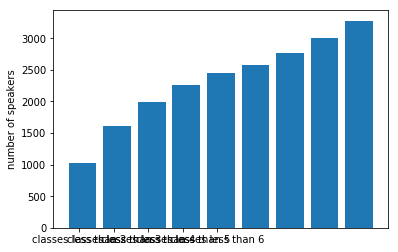

In [23]:
xs = [i + 0.1 for i, _ in enumerate(condit)]

plt.bar(xs, speakers)
plt.ylabel("number of speakers")
plt.xticks([i  for i, _ in enumerate(coins)], condit)
plt.show()

In [8]:
for i in np.argmax(one_hot, axis=1) == y:
    if i != True:
        print 'yes'

In [9]:
gen_x = model.generate(sess, z, one_hot)

In [10]:
np.save('Gen_Data/acgan_wc_x_' + str(n) + '.npy', gen_x)
np.save('Gen_Data/acgan_wc_y_' + str(n) + '.npy', y)
np.save('Gen_Data/acgan_wc_y_onthot_' + str(n) + '.npy', one_hot)

In [11]:
dt = Dataset('/home/kt/NIST_npy/', one_hot=False)
print dt.train_data.shape
print dt.train_label.shape

(36572, 600)
(36572,)


In [12]:
print gen_x.shape
print y.shape

(6883, 600)
(6883,)


In [13]:
dt.add_training_data(gen_x, y)
print dt.train_data.shape
print dt.train_label.shape

Adding training data
(43455, 600)
(43455,)


In [14]:
dt.sort()
mat_x = dt.train_data
mat_y = dt.train_label + 1

sorting


In [15]:
mat_y[0:10]

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [16]:
train_x = {'x': mat_x}
train_y = {'y': mat_y}

In [17]:
mat_path = 'save_mat'
savemat(mat_path + '/acgan_wc_x_' + str(n) + '.mat', train_x)
savemat(mat_path + '/acgan_wc_y_' + str(n) + '.mat', train_y)